In [182]:
import os
import csv
import numpy as np
import pandas
import sys

main_dir = 'C:\\Users\\gkhadge\\Documents\\UCLA\\EE232E\\HW_4'
os.chdir(main_dir)

In [161]:
#data_directory = "/Users/Yusi/Documents/EE232E/HW_4/finance_data/data"
os.chdir(main_dir)
data_directory = "finance_data/data"
os.chdir(data_directory)

close_data = {}
end_date_data = {}
date_data = {}

for root,dirs,files in os.walk(os.path.join(main_dir, data_directory)):
    for file in files:
        if file.endswith(".csv"):
            with open(file) as f:
                #cf = csv.DictReader(f, fieldnames=["Close"])
                cf = csv.reader(f)
                stock_name = file[:-4]
                #cf.next()
                data = pandas.read_csv(file)
                close_data[stock_name] = data["Close"].values
                end_date_data[stock_name] = [data["Date"].values[0], data["Date"].values[-1]]
                
                # Parse into datetime format
                if stock_name[-2:] == '.B':
                    date_format = '%x'
                else:
                    date_format = '%Y-%m-%d'
                dates = [datetime.strptime(data["Date"].values[i], date_format) for i in range(len(data["Date"].values))]
                
                date_data[stock_name] = dates
                

            f.close()
            

In [ ]:
# stock_names = close_data.keys();

# for i in range(len(stock_names)):
#     if end_date_data[stock_names[i]][0] != '2014-05-01':
#         print(stock_names[i])
# #     if end_date_data[stock_names[i]][1] != '2017-05-12':
# #         print(stock_names[i])
        

In [ ]:
# r_i = np.diff(np.log(close_data['A']))
# r_j = np.diff(np.log(close_data['AAL']))

# # p_ij_n = (np.dot(r_i,r_j)/len(r_i) - np.mean(r_i)*np.mean(r_j))
# # p_ij_d = np.sqrt(np.var(r_i) * np.var(r_j))
# #p_ij_d = (np.sqrt((np.mean(np.square(r_i))-np.square(np.mean(r_i)))*(np.mean(np.square(r_j))-np.square(np.mean(r_j))))

# p_ij = (np.dot(r_i,r_j)/len(r_i) - np.mean(r_i)*np.mean(r_j))/ (np.sqrt(np.var(r_i) * np.var(r_j)))
# print(p_ij)


In [183]:
# Correlation Graph for Daily Data
os.chdir(main_dir)
StockNetworkFile = "StockNetworkFile.txt"

f = open(StockNetworkFile, 'w')


stock_names = close_data.keys();
num_stocks = len(stock_names)

d_ij_hist = np.zeros(int(num_stocks*(num_stocks-1)/2.0), dtype=np.float)
p_ij = np.zeros(int(num_stocks*(num_stocks-1)/2.0), dtype=np.float)

ind = 0

for i in range(num_stocks):
    # Loop over all stocks
    stock_i = stock_names[i]
    for j in range(i+1,num_stocks):
        
        stock_j = stock_names[j]
        
        r_i = np.diff(np.log(close_data[stock_i]))
        r_j = np.diff(np.log(close_data[stock_j]))
        
        if len(r_i) != len(r_j):
            min_len = min(len(r_i),len(r_j))     # calculate the minimum length of r_i and r_k

            r_i = r_i[-min_len:] # since all stocks end at the same date, delete non-corresponding time values from the longer data set
            r_j = r_j[-min_len:]

#         print(len(r_i))
#         print(len(r_j))
#         print(stock_j)
        p_ij[ind] = (np.dot(r_i,r_j)/len(r_i) - np.mean(r_i)*np.mean(r_j))/ (np.sqrt(np.var(r_i) * np.var(r_j)))
        
        d_ij = np.sqrt(2*(1-p_ij[ind]))
        d_ij_hist[ind] = d_ij
        
        ind = ind+1
        
        f.write(stock_i+"\t"+stock_j+"\t"+("%.15f" % d_ij)+"\n")

f.close()


In [175]:
date_data['ZTS'][7].weekday()


0

In [181]:
# Correlation Graph for Weekly Data
os.chdir(main_dir)
StockNetworkFile = "StockNetworkFile_Weekly.txt"

f = open(StockNetworkFile, 'w')


stock_names = close_data.keys();
num_stocks = len(stock_names)

d_ij_hist = np.zeros(int(num_stocks*(num_stocks-1)/2.0), dtype=np.float)
p_ij = np.zeros(int(num_stocks*(num_stocks-1)/2.0), dtype=np.float)

ind = 0

for i in range(num_stocks):
    # Loop over all stocks
    stock_i = stock_names[i]
    for j in range(i+1,num_stocks):
        
        stock_j = stock_names[j]
        
        start_day_i = 0;
        start_day_j = 0;
        while date_data[stock_i][start_day_i] < date_data[stock_j][start_day_j]:
            start_day_i += 1
        
        while date_data[stock_i][start_day_i] > date_data[stock_j][start_day_j]:
            start_day_j += 1
            
        weekly_log_close_i = []
        weekly_log_close_j = []
        
        day = 0
        
        curr_day = -1
        while start_day_i + day < len(date_data[stock_i]) and start_day_j + day < len(date_data[stock_j]):
            prev_day = curr_day
            curr_day = date_data[stock_i][start_day_i + day].weekday()
            
            # If Monday, or Tuesday with Monday being a holiday
            if curr_day == 0 or (curr_day == 1 and prev_day == 4):
                weekly_log_close_i.append(np.log(close_data[stock_i][start_day_i + day]))
                weekly_log_close_j.append(np.log(close_data[stock_j][start_day_j + day]))
            
            day += 1
        
        r_i = np.diff(weekly_log_close_i)
        r_j = np.diff(weekly_log_close_j)
        

#         print(len(r_i))
#         print(len(r_j))
#         print(stock_j)
        p_ij[ind] = (np.dot(r_i,r_j)/len(r_i) - np.mean(r_i)*np.mean(r_j))/ (np.sqrt(np.var(r_i) * np.var(r_j)))
        
        d_ij = np.sqrt(2*(1-p_ij[ind]))
        d_ij_hist[ind] = d_ij
        
        ind = ind+1
        
        f.write(stock_i+"\t"+stock_j+"\t"+("%.15f" % d_ij)+"\n")

f.close()


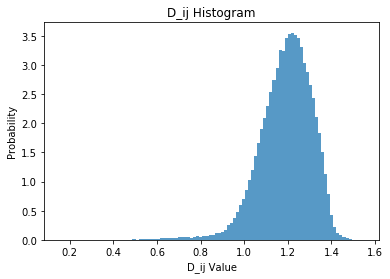

In [4]:
import matplotlib.pyplot as plt

# the histogram of the data
n, bins, patches = plt.hist(d_ij_hist, 100, normed=1, alpha = 0.75)

plt.xlabel('D_ij Value')
plt.ylabel('Probability')
plt.title('D_ij Histogram')

plt.show()

In [12]:
# Problem 7: Modifying Correlation
os.chdir(main_dir)
StockNetworkFileMod = "StockNetworkFileMod.txt"

f = open(StockNetworkFileMod, 'w')

# open new file to save d_ij
d_ij_hist_mod = np.zeros(int(num_stocks*(num_stocks-1)/2.0), dtype=np.float)
p_ij_mod = np.zeros(int(num_stocks*(num_stocks-1)/2.0), dtype=np.float)

ind = 0

for i in range(num_stocks):
    # Loop over all stocks
    stock_i = stock_names[i]
    for j in range(i+1,num_stocks):
        
        stock_j = stock_names[j]
        
        r_i = np.diff(np.log(close_data[stock_i]))
        r_j = np.diff(np.log(close_data[stock_j]))
        
        if len(r_i) != len(r_j):
            min_len = min(len(r_i),len(r_j))     # calculate the minimum length of r_i and r_k

            r_i = r_i[-min_len:] # since all stocks end at the same date, delete non-corresponding time values from the longer data set
            r_j = r_j[-min_len:]

#         print(len(r_i))
#         print(len(r_j))
#         print(stock_j)
        p_ij_mod[ind] = (np.dot(r_i,r_j)/len(r_i) - np.mean(r_i)*np.mean(r_j))/ (np.sqrt(np.var(r_i) * np.var(r_j)))
        
        if p_ij_mod[ind] > 0.3:
            p_ij_mod[ind] = -1
        
        d_ij_mod = np.sqrt(2*(1-p_ij_mod[ind]))
        d_ij_hist_mod[ind] = d_ij_mod
        
        ind = ind + 1
        
        f.write(stock_i+"\t"+stock_j+"\t"+("%.15f" % d_ij_mod)+"\n")

f.close()

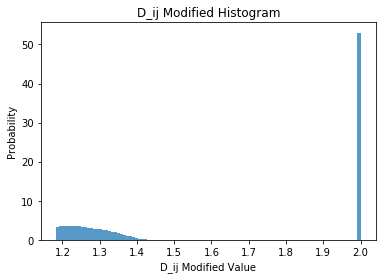

In [14]:
# the histogram of the data
n, bins, patches = plt.hist(d_ij_hist_mod, 100, normed=1, alpha = 0.75)

plt.xlabel('D_ij Modified Value')
plt.ylabel('Probability')
plt.title('D_ij Modified Histogram')

plt.show()

In [2]:
# Eulerian Path Function
from collections import defaultdict

def find_euler_tour(graph):
    tour = []
    E = graph

    numEdges = defaultdict(int)

    def find_tour(u):
        for e in E:
            if u == e[0]:
                u,v = e
                E.remove(e)
                find_tour(v)
            elif u == e[1]:
                v,u = e
                E.remove(e)
                find_tour(v)
        tour.insert(0,u)

    for i,j in graph:
        numEdges[i] += 1
        numEdges[j] += 1

    start = graph[0][0]
    for i,j in numEdges.iteritems():
        if j % 2 > 0:
            start = i
            break

    current = start
    find_tour(current)

    if tour[0] != tour[-1]:
        return None
    return tour


In [111]:
# PROBLEM 5 TSP Approximation using Eulerian Path Method
sys.setrecursionlimit(1500)

# Load MST
with open('StockNetwork_MST.txt', 'rb') as f:
    reader = csv.reader(f, delimiter=' ')
    g_mst = list(reader)
    
# Sum MST weight, and remove edgeweights for find_euler_tour
MST_weight = 0
for i in range(len(g_mst)):
    MST_weight += float(g_mst[i][2])
    g_mst[i] = g_mst[i][0:2]
    
# Double the edges
g_mst_doubled = g_mst + g_mst

# Find Eulerian tour
etour = find_euler_tour(g_mst_doubled)

# Remove duplicate nodes to create TSP approximation
TSP_approx = [];
for i in etour:
  if i not in TSP_approx:
    TSP_approx.append(i)
# Make the TSP end at the starting node
TSP_approx.append(etour[0])

# Open the full graph
with open('StockNetworkFile.txt', 'rb') as f:
    reader = csv.reader(f, delimiter='\t')
    g = list(reader)

# Create dictionary of edge weights. keys are node1_node2 where node1 is alphabetically earlier
edgedict = {}
for edge in g:
    if edge[0] < edge[1]:
        key = edge[0]+'_'+edge[1]
    else:
        key = edge[1]+'_'+edge[0]
    edgedict[key] = float(edge[2])
    
# Sum edgeweights along TSP approx route
TSP_approx_value = 0
for i in range(len(TSP_approx)-1):
    node0 = TSP_approx[i]
    node1 = TSP_approx[i+1]
    if node0 < node1:
        edge = node0+'_'+node1
    else:
        edge = node1+'_'+node0
    TSP_approx_value += edgedict[edge]    

print "MST Weight: {:0.2f}".format(MST_weight)
print "TSP Approx: {:0.2f}".format(TSP_approx_value)

MST Weight: 426.37
TSP Approx: 485.38
